In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import tensorflow as tf
import keras

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

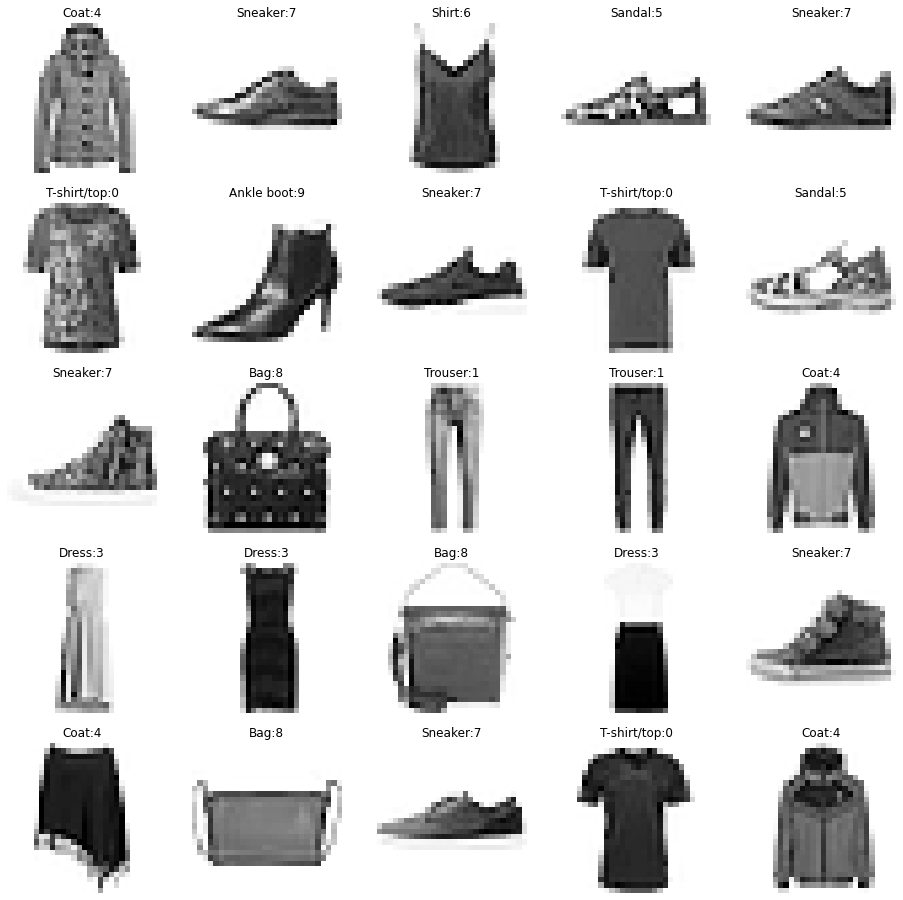

In [ ]:

plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);
  j+=1
  plt.imshow(X_train[i],"Greys")
  plt.axis('off')
  plt.title("{}:{}".format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_train.ndim,X_test.ndim

(4, 4)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=128,activation='relu'),
                               keras.layers.Dropout(0.25),
                               keras.layers.Dense(units=256,activation='relu'),
                               keras.layers.Dropout(0.25),
                               keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               73856     
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 24s 246ms/step - loss: 1.0695 - accuracy: 0.6072 - val_loss: 0.6213 - val_accuracy: 0.7602
Epoch 2/10
94/94 [==============================] - 23s 242ms/step - loss: 0.5921 - accuracy: 0.7782 - val_loss: 0.5010 - val_accuracy: 0.8144
Epoch 3/10
94/94 [==============================] - 23s 245ms/step - loss: 0.4968 - accuracy: 0.8164 - val_loss: 0.4379 - val_accuracy: 0.8378
Epoch 4/10
94/94 [==============================] - 23s 246ms/step - loss: 0.4402 - accuracy: 0.8386 - val_loss: 0.4006 - val_accuracy: 0.8539
Epoch 5/10
94/94 [==============================] - 23s 245ms/step - loss: 0.3971 - accuracy: 0.8574 - val_loss: 0.3660 - val_accuracy: 0.8643
Epoch 6/10
94/94 [==============================] - 23s 245ms/step - loss: 0.3695 - accuracy: 0.8666 - val_loss: 0.3504 - val_accuracy: 0.8686
Epoch 7/10
94/94 [==============================] - 23s 244ms/step - loss: 0.3497 - accuracy: 0.8733 - val_loss: 0.3473 - val_accuracy: 0.8698

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.68, 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3120 - accuracy: 0.8876


[0.3119952976703644, 0.8876000046730042]

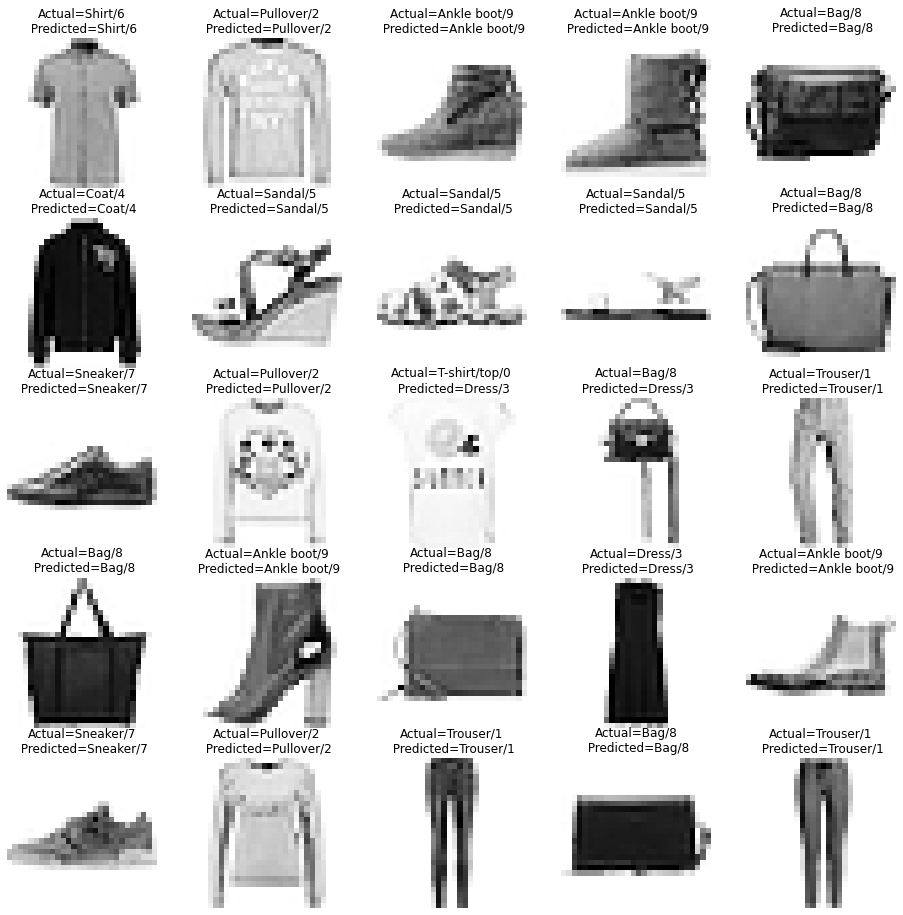

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);
  j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{}\n Predicted={}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.79      0.83      1000
       Dress       0.84      0.93      0.88      1000
        Coat       0.79      0.84      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.64      0.67      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



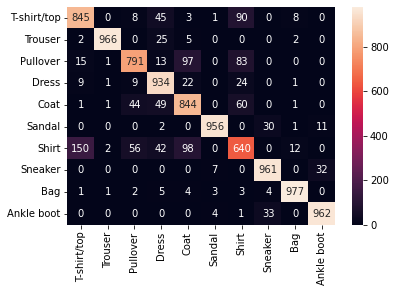

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

In [ ]:
model.save('fashion_mnist_cnn_model.h5')